# A Guide to Time Series Visualization with Python 3

* Ref: [https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3](https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-visualization-with-python-3)
* Data: 使用 statsmodels 內自帶的資料集
  * Atmospheric CO2 from Continuous Air Samples at Mauna Loa Observatory, Hawaii, U.S.A.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from IPython.display import display

## 1. Load data

In [27]:
import statsmodels.api as sm
data = sm.datasets.co2.load_pandas()

df = data.data
df.head()

,co2
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4


In [28]:
df.index

DatetimeIndex(['1958-03-29', '1958-04-05', '1958-04-12', '1958-04-19',
               '1958-04-26', '1958-05-03', '1958-05-10', '1958-05-17',
               '1958-05-24', '1958-05-31',
               ...
               '2001-10-27', '2001-11-03', '2001-11-10', '2001-11-17',
               '2001-11-24', '2001-12-01', '2001-12-08', '2001-12-15',
               '2001-12-22', '2001-12-29'],
              dtype='datetime64[ns]', length=2284, freq='W-SAT')

* 分析 time series 資料的時候，要先確認 date 是 index 而且格式是 datetime64[ns]
* `freq='W-SAT'` 表示資料是 weekly 的，從 Saturday 開始
* 想看每個月的資料，所以要對資料做 resample 成 monthly 的
  * 參數 `MS`: `M` 表示 monthly，`S` 表示 start 就是說以每個月第一天當作是 resample 後資料的日期，如果不加上 `S` 的話預設上是會用每個月的最後一天當作 resample 後的日期

In [29]:
y = df["co2"].resample("MS").mean()
y.head()

1958-03-01    316.100000
1958-04-01    317.200000
1958-05-01    317.433333
1958-06-01           NaN
1958-07-01    315.625000
Freq: MS, Name: co2, dtype: float64

* `y` 現在是一個 time series 可以用日期做一些簡單的篩選動作
* 取出 1990 年以後的資料

In [30]:
y["1990":]

1990-01-01    353.650
1990-02-01    354.650
1990-03-01    355.480
1990-04-01    356.175
1990-05-01    357.075
               ...   
2001-08-01    369.425
2001-09-01    367.880
2001-10-01    368.050
2001-11-01    369.375
2001-12-01    371.020
Freq: MS, Name: co2, Length: 144, dtype: float64

* 取出 1995/10 到 1996/10 的資料

In [31]:
y["1995-10-01":"1996-10-01"]

1995-10-01    357.850
1995-11-01    359.475
1995-12-01    360.700
1996-01-01    362.025
1996-02-01    363.175
1996-03-01    364.060
1996-04-01    364.700
1996-05-01    365.325
1996-06-01    364.880
1996-07-01    363.475
1996-08-01    361.320
1996-09-01    359.400
1996-10-01    359.625
Freq: MS, Name: co2, dtype: float64

* 做 missing value imputation

In [32]:
y.isnull().sum()

5

* 這筆資料內有 5 個 missing value
  * 這裡採用 `pd.fillna()` 來填補空缺的資料
  * 這裡採用 `bfill()` (backward fill) 的方式來填補資料，就是說用最接近的非空白值來往前填

In [33]:
y = y.fillna(y.bfill()) # 填補缺失的資料
y.isnull().sum() # 填好缺失值之後確認一下已經沒有缺失值了

0

## 2. Visualizing Time-series Data
* 藉由 data visualization 可以看看資料的
  * trend
  * seasonality: [http://www.wessa.net/download/stl.pdf](http://www.wessa.net/download/stl.pdf)
  * noise

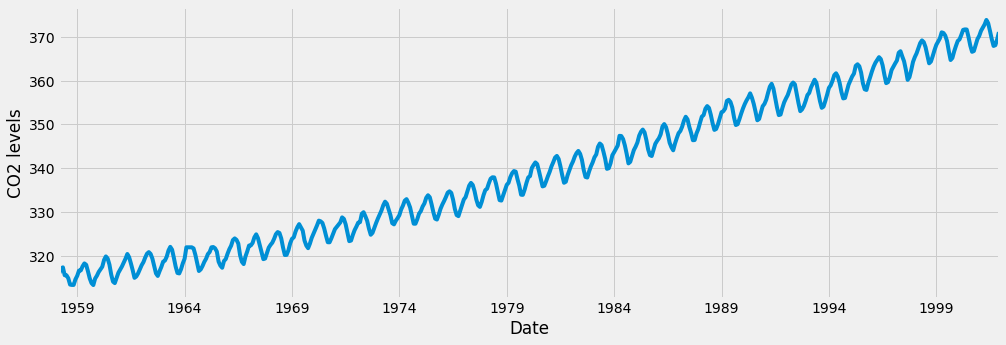

In [34]:
y.plot(figsize=(15, 5))
plt.xlabel("Date")
plt.ylabel("CO2 levels")
plt.show()

* 用 statsmodels 自帶的 seasonal_decompose 來做 decomposition
  * `sm.tsa.seasonal_decompose()`

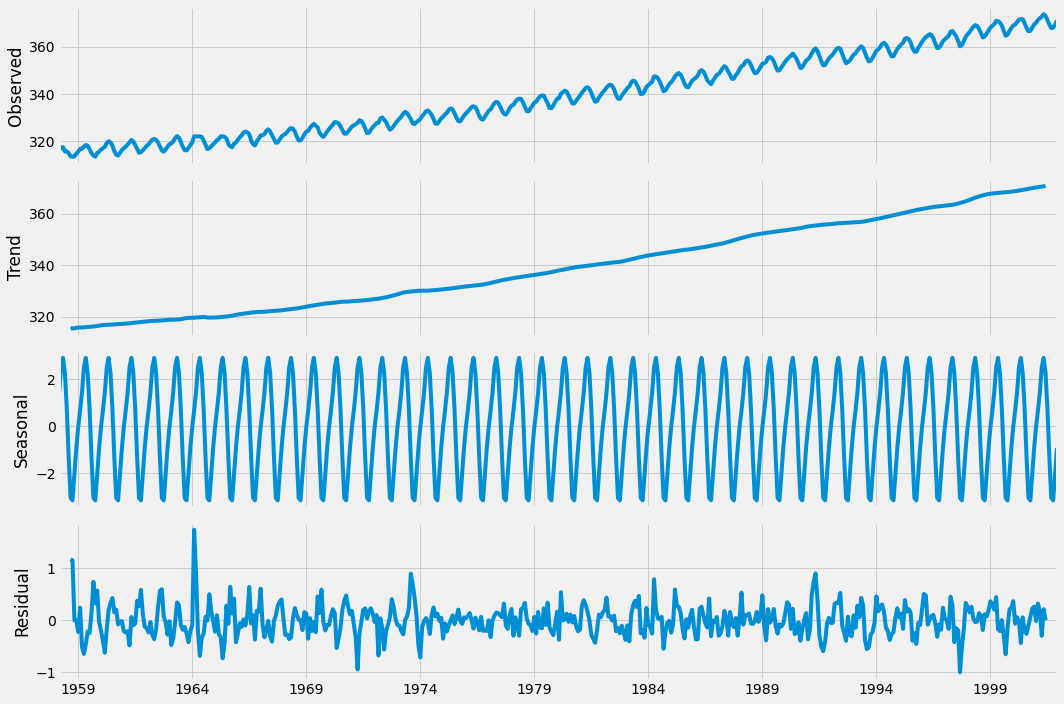

In [35]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10 # 設定圖片大小，seasonal_decompose() 的圖片大小只能用這個方式來修改

decomposition = sm.tsa.seasonal_decompose(y, model='additive') # 用的是 additive model: Trend + Seasonality + Residual
fig = decomposition.plot()
plt.show()

## 3. Load data
* Use sunspots data comes with the statsmodels

In [36]:
df = data = sm.datasets.sunspots.load_pandas().data
df.head()

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         309 non-null    float64
 1   SUNACTIVITY  309 non-null    float64
dtypes: float64(2)
memory usage: 5.0 KB


注意年份的型態是 float64 所以要把這個改成 datetime64[ns] 然後設成 index

In [38]:
df["YEAR"] = df["YEAR"].agg(lambda x: int(x))

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         309 non-null    int64  
 1   SUNACTIVITY  309 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 5.0 KB


In [40]:
df["YEAR"] = pd.to_datetime(df["YEAR"], format="%Y")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   YEAR         309 non-null    datetime64[ns]
 1   SUNACTIVITY  309 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.0 KB


In [42]:
df.set_index("YEAR", inplace=True)
df.head()

,SUNACTIVITY
YEAR,
1700-01-01,5.0
1701-01-01,11.0
1702-01-01,16.0
1703-01-01,23.0
1704-01-01,36.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 309 entries, 1700-01-01 to 2008-01-01
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUNACTIVITY  309 non-null    float64
dtypes: float64(1)
memory usage: 4.8 KB


## 4. Visualizing Time-series Data

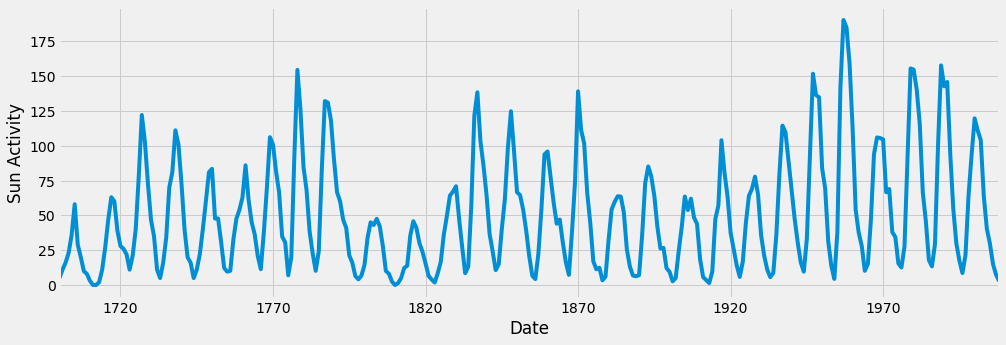

In [44]:
fig, ax = plt.subplots(figsize=(15, 5))
df["SUNACTIVITY"].plot(ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Sun Activity")
plt.show()

* decomposition

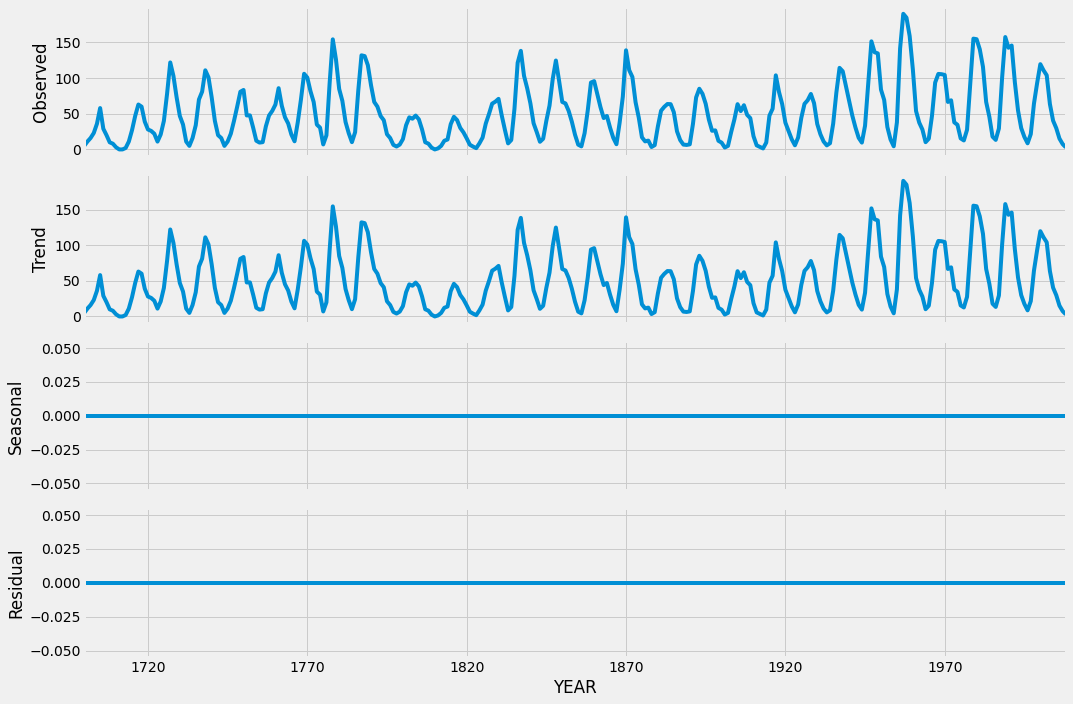

In [45]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10 # 設定圖片大小，seasonal_decompose() 的圖片大小只能用這個方式來修改

decomposition = sm.tsa.seasonal_decompose(df["SUNACTIVITY"], model='additive')
fig = decomposition.plot()
plt.show()